In [1]:
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
from nilearn import image as nli

In [2]:
# Load a functional image of subject 01
img = nb.load('data/sub-01_rest-EC.nii.gz')
print(img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 52, 38, 100)
affine: 
[[  -4.    0.    0.   82.]
 [   0.    4.    0. -126.]
 [   0.    0.    4.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  40  52  38 100   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : mni
sform_cod

In [3]:
data = img.get_fdata()
data.shape

(40, 52, 38, 100)

In [4]:
header = img.header['pixdim']
header

array([-1.,  4.,  4.,  4.,  2.,  0.,  0.,  0.], dtype=float32)

In [5]:
affine = img.affine
affine

array([[  -4.,    0.,    0.,   82.],
       [   0.,    4.,    0., -126.],
       [   0.,    0.,    4.,  -72.],
       [   0.,    0.,    0.,    1.]])

(40, 52, 38, 100)


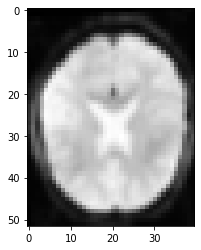

In [6]:
plt.imshow(data[:, :, 23, 99].T, cmap='Greys_r')
print(data.shape)

Editing & Saving Image

In [7]:
# Fist load image
img2 = nb.load("data/sub-01_rest-EC.nii.gz")
data2 = img2.get_fdata()

In [8]:
data2.min()

-125.0

In [9]:
# Now we force the values to be between 0 and 255
# and change the datatype to unsigned 8-bit
rescaled = ((data2 - data2.min()) * 255. / (data2.max() - data2.min())).astype(np.uint8)

In [10]:
# Save new Image
new_img = nb.Nifti1Image(rescaled, affine=img2.affine, header=img2.header)
nb.save(new_img, 'tmp/rescaled_image.nii.gz')

# NILEARN

In [11]:
bold = nli.load_img('data/sub-01_rest-EC.nii.gz')
bold

In [12]:
bold = bold.slicer[..., 5:]
bold

C:\Users\Sir-Lord\AppData\Local\Programs\Python\Python39\lib\site-packages\nilearn\plotting\html_stat_map.py:112: UserWarning: Threshold given was 1e-06, but the data has no values below -97.95789337158203. 
  warnings.warn("Threshold given was {0}, but "



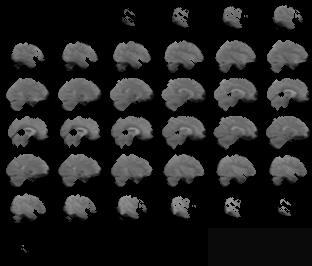
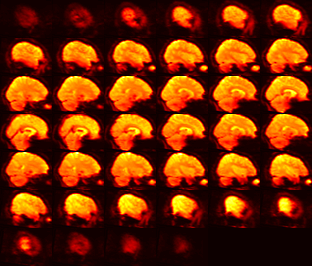

In [13]:
img = nli.mean_img(bold)
plotting.view_img(img, bg_img=img)